First try in implementing the Klausmeier ODE System and generating synthetic data.

###### [1] Klausmeier, C. A. (1999). Regular and irregular patterns in semiarid vegetation. *Science, 284*(5421), 1826-1828. https://doi.org/10.1126/science.284.5421.1826


In [2]:
cd("C:/Users/lisah/Documents/Repos/ma-code")

In [3]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [4]:
using DifferentialEquations, CSV, DataFrames, Plots

In [5]:
# define spatially homogeneous version of Klausmeier model
function klausmeier!(du,u,p,t)
 du[1] = -u[1] - u[1] * u[2]^2 + p[1]
 du[2] = u[1] * u[2]^2 - p[2] * u[2]
end

klausmeier! (generic function with 1 method)

In [6]:
# try to solve for some prms
u0 = [0.0;4.0]          # initial conditions
tspan = (0.0,29.0)      # start and end point of the time period to be considered
a = 1.1
m = 0.45                # value as in [1]
p = [a;m]

prob = ODEProblem(klausmeier!, u0, tspan, p)
sol = solve(prob,
    #saveat=1.0  # consider specific time points
    )

df_sol = DataFrame(time=sol.t, u1=sol[1, :], u2=sol[2, :])  # Modify based on system size


Row,time,u1,u2
,Float64,Float64,Float64
1,0.0,0.0,4.0
2,0.000908864,0.00099207,3.99837
3,0.00624752,0.00652109,3.9891
4,0.017186,0.0164144,3.97152
5,0.032638,0.0276707,3.94938
6,0.0526945,0.038666,3.92425
7,0.0783474,0.0485362,3.89633
8,0.110033,0.0565099,3.8662
9,0.14871,0.062497,3.83345


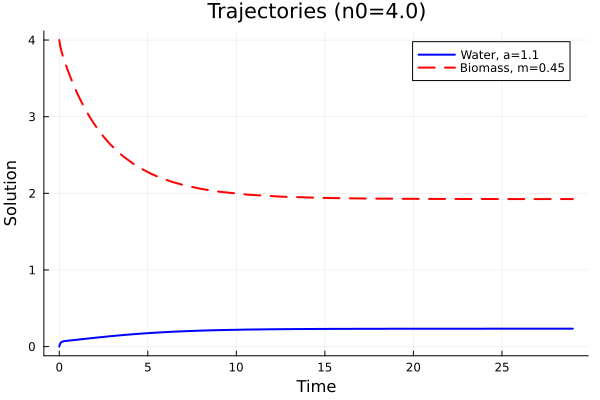

In [7]:
# plot for better visualization
plot(df_sol.time, df_sol.u1, label="Water, a=$a", lw=2, color=:blue)
plot!(df_sol.time, df_sol.u2, label="Biomass, m=$m", lw=2, linestyle=:dash, color=:red)

xlabel!("Time")
ylabel!("Solution")
title!("Trajectories (n0=$(u0[2]))")

In [8]:
# save data to csv
CSV.write("./data/data_a$(a)_ic$(u0[2]).csv", df_sol)


"./data/data_a1.1_ic4.0.csv"

TODO: generate synthetic data for different interesting prm combinations of a, n0